In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
train_df = train.copy()
test_df = test.copy()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [6]:
train_df.date_time.dtype

dtype('O')

In [7]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'])

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [9]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'])

Conclusions time split of data validation set to be made accordingly

In [10]:
train_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [11]:
def LabelEncode(dataf,datap):
    le = LabelEncoder()
    le.fit(dataf)
    v = le.transform(datap)
    return v

In [12]:
def findweekday(a):
    return a.weekday()

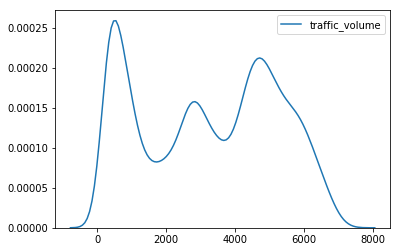

In [13]:
sns.kdeplot(train_df.traffic_volume)

# Train preprocessing

In [14]:
train_df['weather_type'] = LabelEncode(train_df['weather_type'].append([test_df['weather_type']]),train_df['weather_type'])
train_df['is_holiday'] = LabelEncode(train_df['is_holiday'].append([test_df['is_holiday']]),train_df['is_holiday'])
train_df['weather_description'] = LabelEncode(train_df['weather_description'].append([test_df['weather_description']]),train_df['weather_description'])
train_df['month'] = train_df['date_time'].dt.month
train_df['day'] = train_df['date_time'].apply(findweekday)
train_df['hour'] = train_df['date_time'].dt.hour

In [15]:
train_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,month,day,hour
0,2012-10-02 09:00:00,7,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,10,1,9
1,2012-10-02 10:00:00,7,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10,1,10
2,2012-10-02 11:00:00,7,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,10,1,11
3,2012-10-02 12:00:00,7,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,10,1,12
4,2012-10-02 13:00:00,7,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,10,1,13


In [16]:
test_df['weather_type'] = LabelEncode(test_df['weather_type'].append([train['weather_type']]),test_df['weather_type'])
test_df['is_holiday'] = LabelEncode(test_df['is_holiday'].append([train['is_holiday']]),test_df['is_holiday'])
test_df['weather_description'] = LabelEncode(train['weather_description'].append([test_df['weather_description']]),test_df['weather_description'])
test_df['month'] = test_df['date_time'].dt.month
test_df['day'] = test_df['date_time'].apply(findweekday)
test_df['hour'] = test_df['date_time'].dt.hour

In [17]:
test_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,month,day,hour
0,2017-05-18 00:00:00,7,73,63,1,27,4,4,285.15,0.0,0,90,6,18,5,3,0
1,2017-05-18 00:00:00,7,251,63,1,27,4,4,285.15,0.0,0,90,5,17,5,3,0
2,2017-05-18 00:00:00,7,75,56,1,0,1,1,285.15,0.0,0,90,2,11,5,3,0
3,2017-05-18 01:00:00,7,98,56,1,351,2,2,284.79,0.0,0,90,6,9,5,3,1
4,2017-05-18 01:00:00,7,283,56,1,351,1,1,284.79,0.0,0,90,5,17,5,3,1


In [18]:
new_train = train_df.drop(['date_time'],axis=1)

In [19]:
new_test = test_df.drop(['date_time'],axis=1)

In [20]:
new_train.wind_speed.value_counts()

2     6599
3     6549
4     5238
1     5001
5     3863
6     2510
7     1345
0     1331
8      748
9      359
10     123
11      52
12      17
13      10
15       3
14       1
16       1
Name: wind_speed, dtype: int64

In [21]:
new_test.is_holiday.value_counts()

7     14436
4         3
3         3
5         2
2         2
8         2
6         1
11        1
10        1
9         1
1         1
0         1
Name: is_holiday, dtype: int64

In [22]:
#Time based split

In [23]:
tscv = TimeSeriesSplit(n_splits=2)

In [24]:
y = new_train.traffic_volume

In [25]:
x = new_train.drop(['traffic_volume'],axis=1)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=False)

In [ ]:
#applying staking to the problem
model1 = RandomForestRegressor()
model2 = XGBRegressor()
model3 = LGBMRegressor()
model4 = CatBoostRegressor()
model5 = BaggingRegressor()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)
pred5 = model5.predict(x_test)

predt1 = model1.predict(new_test)
predt2 = model2.predict(new_test)
predt3 = model3.predict(new_test)
predt4 = model4.predict(new_test)
predt5 = model5.predict(new_test)

stacked_pred = np.column_stack((pred1,pred2,pred3,pred4,pred5))
stacked_test_pred = np.column_stack((predt1,predt2,predt3,predt4,predt5))

meta_model = RandomForestRegressor()
meta_model.fit(stacked_pred,y_test)
final_pred = meta_model.predict(stacked_test_pred)

In [ ]:
stacked_test_pred

In [ ]:
y_test.values

In [ ]:
final_pred

In [ ]:
bagged_pred = np.zeros(new_test.shape[0])

In [ ]:
seed = 310
bags = 4

In [ ]:
for n in range(0,4):
    rf = RandomForestRegressor(n_estimators=280,n_jobs=-1,random_state=seed+n,max_features=9,min_samples_leaf=5,min_samples_split=20)
    rf.fit(x,y)
    preds = rf.predict(new_test)
    bagged_pred+=preds
bagged_pred/=bags

In [ ]:
score(y_test,bagged_pred)

In [ ]:
#different model defined

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor()

model_xgb = XGBRegressor()

random_reg = RandomForestRegressor(n_estimators=280,n_jobs=-1,random_state=361,
                                   max_features=9,min_samples_leaf=5,
                                   min_samples_split=20)

model_lgb = lgb.LGBMRegressor()

In [31]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=2):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [32]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR,model_xgb,random_reg,model_lgb),
                                                 meta_model = lasso)

In [33]:
stacked_averaged_models.fit(x.values,y.values)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


StackingAveragedModels(base_models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=...0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)),
            meta_model=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]),
            n_folds=2)

In [34]:
pred = stacked_averaged_models.predict(new_test.values)

In [35]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':pred})

kk.to_csv("sub7_stack.csv",index=False)

In [ ]:
rf.get_params()

In [ ]:
rf.feature_importances_

In [ ]:
rf.fit(x,y)

In [ ]:
y_pred2 = rf.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':final_pred})

In [ ]:
kk.to_csv("sub7_stack.csv",index=False)

In [ ]:
cb = CatBoostRegressor()

In [ ]:
x_train.head()

In [ ]:
cat_features = [0,11,12,13,14,15,16]

In [ ]:
cb.fit(x_train,y_train,cat_features=cat_features,eval_set=(x_test,y_test),plot=True)

In [ ]:
def score(y_actual,y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    rms = rms/10000
    return max(0,100-rms)

In [ ]:
y_pred = cb.predict(x_test)

In [ ]:
score(y_test,y_pred)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
score(y_test,y_pred)

In [ ]:
rf.fit(x,y)

In [ ]:
y_pred2 = rf.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub1.csv",index=False)

In [ ]:
xg = XGBRegressor()

In [ ]:
xg.fit(x_train,y_train)

In [ ]:
v = xg.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
xg.fit(x,y)

In [ ]:
y_pred2 = xg.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub2.csv",index=False)

In [ ]:
cb = CatBoostRegressor(iterations=5000,learning_rate=0.1,depth=7)

In [ ]:
cb.fit(x_train,y_train,eval_set=(x_test,y_test),plot=True,cat_features=cat_features,early_stopping_rounds=300,use_best_model=True,verbose_eval=100)

In [ ]:
v = cb.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
lb = LGBMRegressor()

In [ ]:
lb.fit(x_train,y_train)

In [ ]:
v = lb.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
lb.fit(x,y)

In [ ]:
y_pred2 = lb.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub3.csv",index=False)

In [ ]:
cb = CatBoostRegressor(iterations=3000)

In [ ]:
cb.fit(x,y)

In [ ]:
y_pred2 = cb.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub4.csv",index=False)